# GS Final

In [1]:
using FFTW
using PyPlot
using Random
using LinearAlgebra

┌ Info: Recompiling stale cache file /Users/chrisbautista/.julia/compiled/v1.1/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/chrisbautista/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


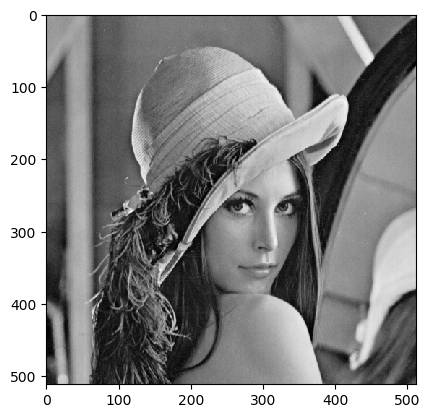

In [2]:
target = Float64.(imread("lena_gray.png"))
d = 0
fn = "/Users/chrisbautista/Documents/IPL/GS Algorithm notes/LenaIterations/$d.png" 
#https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena.html
imshow(target, interpolation="none", cmap="gray")
savefig(fn)

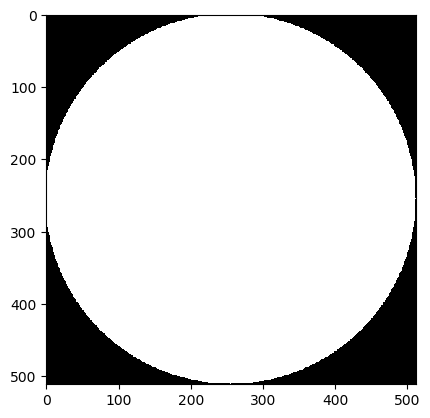

PyObject <matplotlib.image.AxesImage object at 0x144676898>

In [3]:
source_size = size(target)[1]
source = zeros(source_size, source_size);

for i in 1:source_size
    for j in 1:source_size
        if sqrt((source_size/2 - i)^2 + (source_size/2 - j)^2) <= (source_size)//2
            source[i,j] = 1
        end
    end
end

imshow(source, interpolation="none", cmap="gray")

In [17]:
function GS(S,T)
    Random.seed!(1233)
    error_tol = 1e-2
    dim = size(S,1)
    a = abs.(T) .* exp.(1im.*(rand(dim,dim)))#(rand(dim,dim).*(2*pi).-pi))
    x = a
    k = 0
    f = abs.(T)
    F = abs.(fft(T)./dim)
    
    E_ks = []
    e_ks = []
    E_kprev = 0
    e_kprev = 0
    
    for k in 1:1000
        if k%10 == 0
            println(k)
        end
        
        b = fft(a)
        c = abs.(T) .* exp.(1im.*angle.(b))
        d = ifft(c)
        a = abs.(S) .* exp.(1im.*angle.(d))
        
        X = fft(x)./dim
        Y = abs.(F) .* exp.(1im.*angle.(X))
        E_k = sqrt(dim) .* norm(abs.(X) .- F) #diff_error(c,b)
        push!(E_ks,E_k)
        
        y = dim.*ifft(Y)
        x = abs.(f) .* exp.(1im.*angle.(y))
        e_k = sqrt(dim) .* norm(abs.(y) .- f) #img_error(a,d)
        push!(e_ks,e_k)
        
        anim(a, E_ks, e_ks, k)
        
        if (abs(E_kprev - E_k)) < error_tol && (abs(e_kprev - e_k)) < error_tol
            break
        end
        
        E_kprev = E_k
        e_kprev = e_k
    end
    Rphase = angle.(a)
    println("success after ",length(E_ks)," iterations")
    return Rphase, E_ks, e_ks
end

GS (generic function with 1 method)

In [18]:
function anim(a, E_ks, e_ks, k)
    f1 = figure()
    ax1 = f1.add_subplot(111)
    ax1.imshow(abs.(fft(source.*exp.(1im.*angle.(a)))), cmap="gray")
    title("$k iterations")
    fn = "/Users/chrisbautista/Documents/IPL/GS Algorithm notes/LenaIterations/$k.png" 
    savefig(fn)
    close(f1)

    f2 = figure()
    ax2 = f2.add_subplot(111)
    ax2.plot(E_ks)
    title("Diffraction plane error")
    xlabel("Number of iterations")
    ylabel("Error")
    xlim(0,180)
    fn = "/Users/chrisbautista/Documents/IPL/GS Algorithm notes/DPE/$k.png" 
    savefig(fn)
    close(f2)

    f3 = figure()
    ax3 = f3.add_subplot(111)
    ax3.plot(e_ks)
    title("Image plane error")
    xlabel("Number of iterations")
    ylabel("Error")
    xlim(0,180)
    fn = "/Users/chrisbautista/Documents/IPL/GS Algorithm notes/IPE/$k.png" 
    savefig(fn)
    close(f3)
end

anim (generic function with 3 methods)

In [19]:
result = GS(source,target);

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
success after 180 iterations


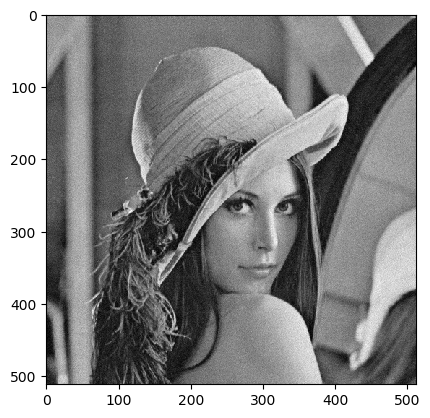

PyObject <matplotlib.image.AxesImage object at 0x1447107b8>

In [20]:
imshow(abs.(fft(source.*exp.(1im.*result[1]))), cmap="gray")

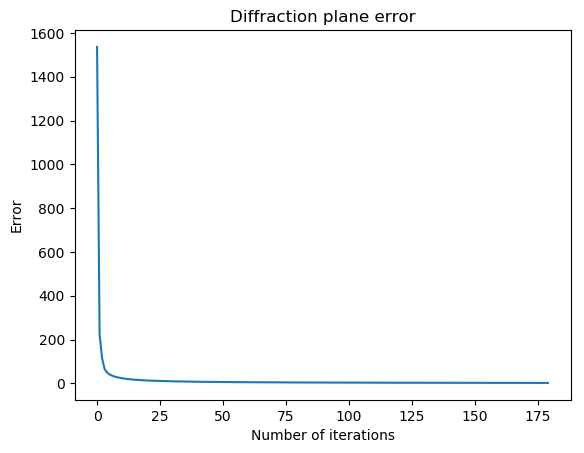

In [21]:
plot(result[2])
title("Diffraction plane error")
xlabel("Number of iterations")
ylabel("Error")
show()

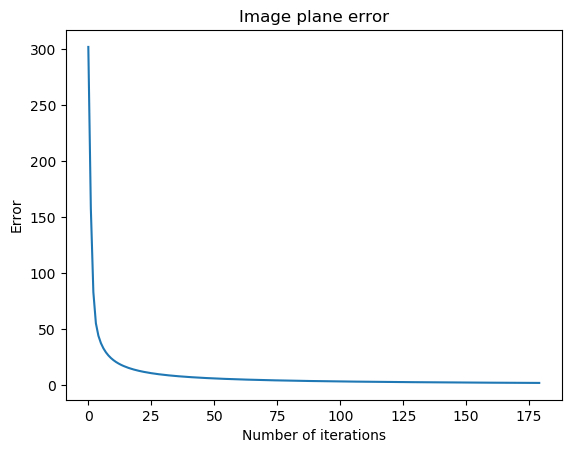

In [22]:
plot(result[3])
title("Image plane error")
xlabel("Number of iterations")
ylabel("Error")
show()

In [23]:
result[2]

180-element Array{Any,1}:
 1536.3177451205217   
  223.31904029415256  
  113.94226700355571  
   65.74784320858993  
   48.79323083512587  
   40.527147919755706 
   35.04135825201746  
   30.98539644692978  
   27.837830250700815 
   25.315996456616265 
   23.246058140018967 
   21.513924010963812 
   20.041437325818375 
    ⋮                 
    2.2038300743032773
    2.1927307820848587
    2.181751814402108 
    2.1708911746503086
    2.160146910716643 
    2.1495171137385354
    2.1389999169036997
    2.1285934942891287
    2.1182960597404596
    2.108105865785834 
    2.098021202587169 
    2.0880403969250585

In [24]:
result[3]

180-element Array{Any,1}:
 301.68152228589736  
 157.53564109037362  
  83.00544584793093  
  55.28733150521964  
  44.14573664297129  
  37.55861751107341  
  32.87755791259008  
  29.320398532618196 
  26.512143426132074 
  24.233241964374916 
  22.343656197825315 
  20.749378000675314 
  19.384722490855918 
   ⋮                 
   2.1982652703499013
   2.187226392596124 
   2.1763068354405513
   2.1655046246825416
   2.1548178299865617
   2.1442445636624794
   2.1337829794851078
   2.123431271553413 
   2.11318767318752  
   2.1030504558612697
   2.0930179281707186
   2.0830884348348326